In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')



In [2]:
#importing train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('gender_submission.csv')

In [3]:
#this is our training set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#number of rows in training set
len(train)

891

In [5]:
#this is our test set
test.head() #head shows top 5 data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#number of rows in test set
len(test)

418

In [7]:
train.describe() #this shoes that we have some missing data in age coulmn.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


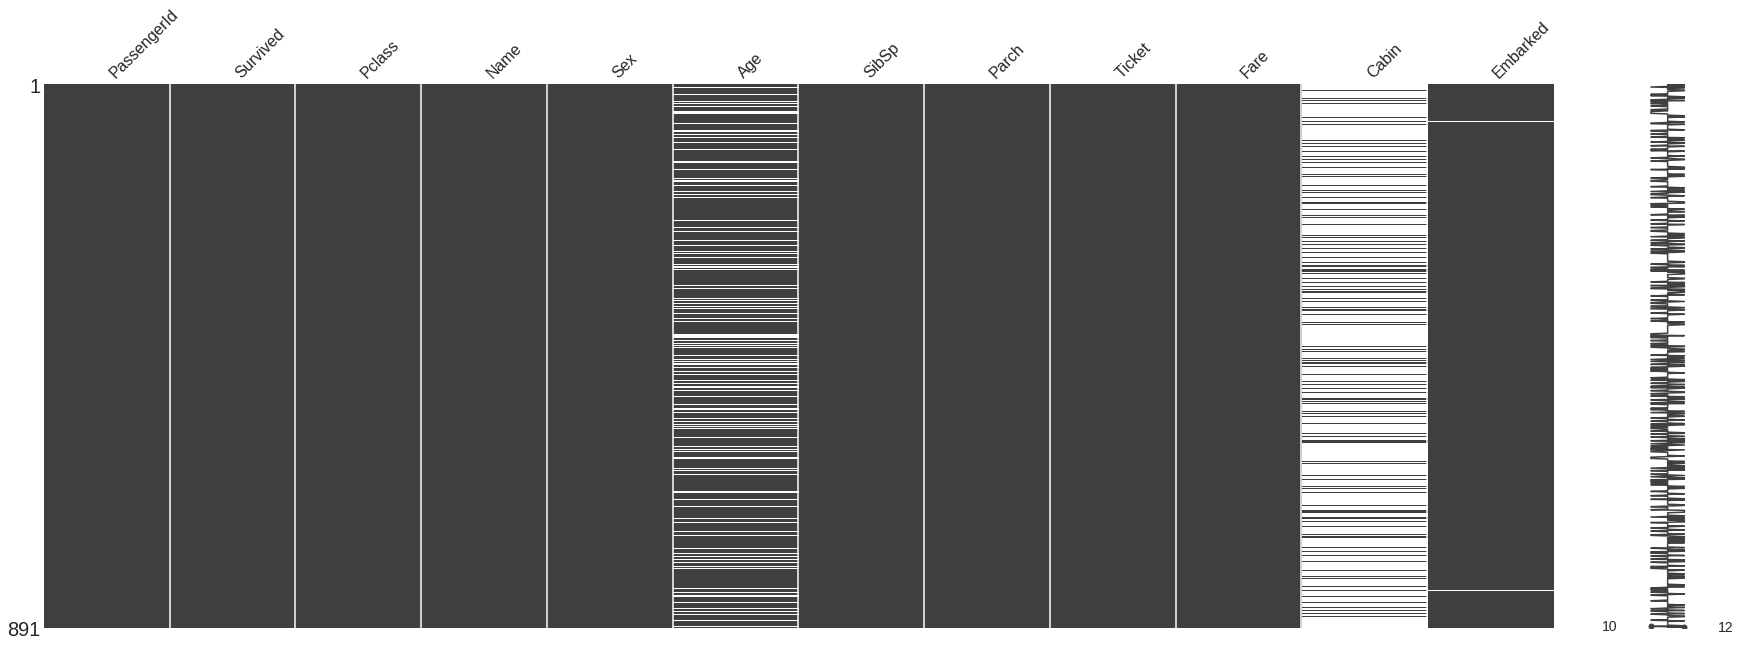

In [8]:
missingno.matrix(train, figsize = (30, 10))

In [9]:
#columns are
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#find the number of missing values in each column
#we can call it our missing data dictionary

def find_missing_values(df, columns):
    missing_values = {}
    print("number of missing and NaN values for each columns")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_length-total_column_values
    return missing_values
missing_values = find_missing_values(train, columns = train.columns)

#printing dictionary
missing_values

number of missing and NaN values for each columns


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [11]:
#before we start analysing, let's create two dataframes

df_bin = pd.DataFrame() #for discretized continuous variables
df_con = pd.DataFrame() #for continuous variables

In [12]:
#now let's check the datatypes in our data sets
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#now we'll see each column one by one

In [14]:
#SURVIVED

0    549
1    342
Name: Survived, dtype: int64


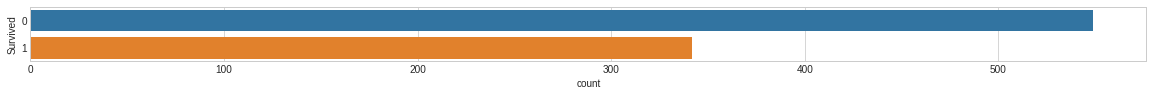

In [15]:
#here we are looking for the number of people survived in the training set

fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'Survived', data = train)
print(train.Survived.value_counts())

In [16]:
#putting the values in both the dataframes

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [17]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
#PCLASS

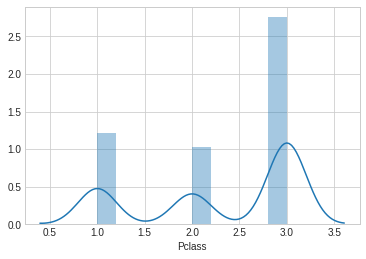

In [20]:
sns.distplot(train.Pclass)

In [21]:
missing_values['Pclass'] #missing value in pclass

0

In [22]:
#let's put it in our dataframes

df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [23]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [24]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [25]:
#NAMES

In [26]:
#different names in training set

train.Name.value_counts()

Minahan, Miss. Daisy E                                      1
Dooley, Mr. Patrick                                         1
Carter, Mr. William Ernest                                  1
Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)      1
Minahan, Dr. William Edward                                 1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)         1
Gee, Mr. Arthur H                                           1
Olsen, Mr. Karl Siegwart Andreas                            1
Gilnagh, Miss. Katherine "Katie"                            1
Turpin, Mr. William John Robert                             1
Hays, Miss. Margaret Bechstein                              1
Taussig, Miss. Ruth                                         1
Eklund, Mr. Hans Linus                                      1
Ekstrom, Mr. Johan                                          1
Panula, Master. Juha Niilo                                  1
Greenberg, Mr. Samuel                                       1
Davies, 

In [27]:
#SEX

male      577
female    314
Name: Sex, dtype: int64


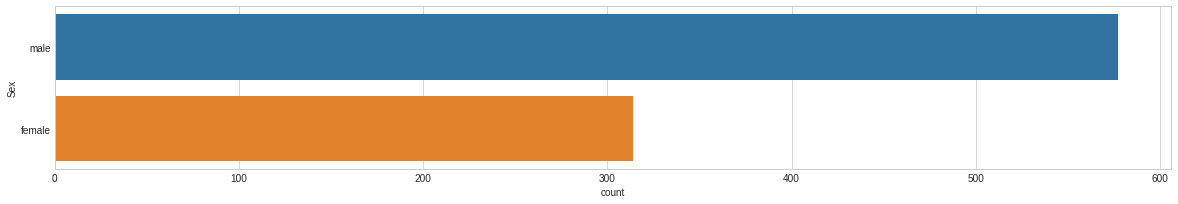

In [28]:
#here we calculate the number of males and females in our training set

plt.figure(figsize = (20,3))
sns.countplot(y = 'Sex', data = train)
print(train.Sex.value_counts())

In [29]:


# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']



In [30]:
df_bin.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

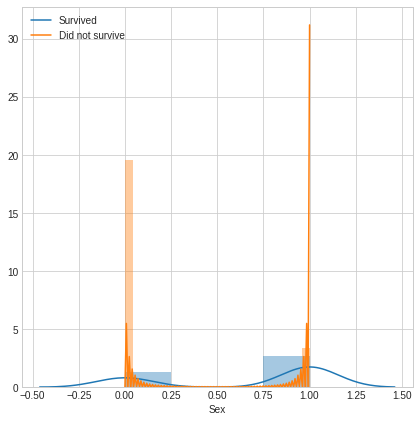

In [31]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(7, 7))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

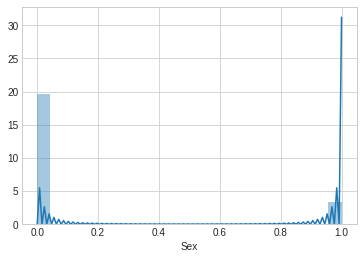

In [32]:
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], label='sae_ae = 1')

In [33]:
#AGE

In [34]:
missing_values['Age'] #missing values in age

177

In [35]:
#df_bin['Age'] = pd.cut(train['Age'], 10) #binned into different catagories
#df_con['Age'] = train['Age']

In [44]:


def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});



In [45]:
#SIBSP

In [46]:
missing_values['SibSp']

0

In [47]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

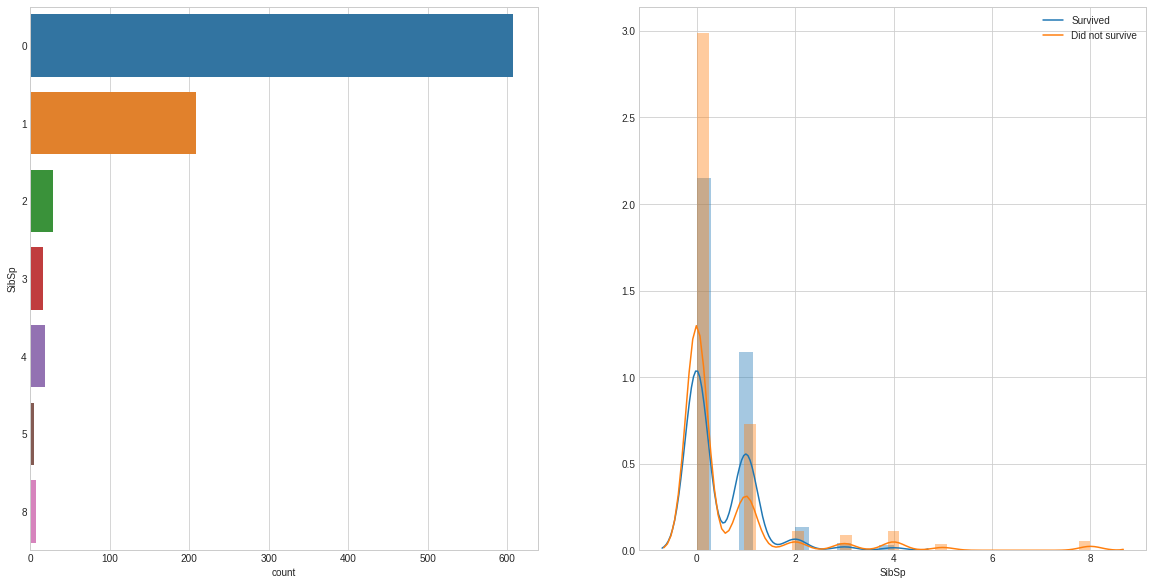

In [49]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [42]:
df_bin.head()

,Survived,Pclass,Sex,SibSp
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


In [50]:
#PARCH

In [51]:
missing_values['Parch']

0

In [54]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [56]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

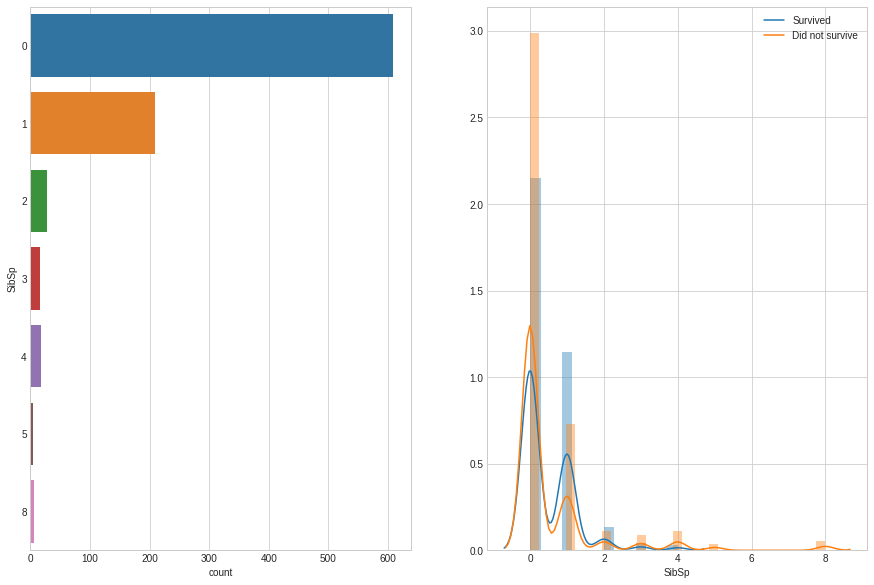

In [59]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(15, 10))

In [60]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [61]:
#TICKET

In [62]:
missing_values['Ticket']

0

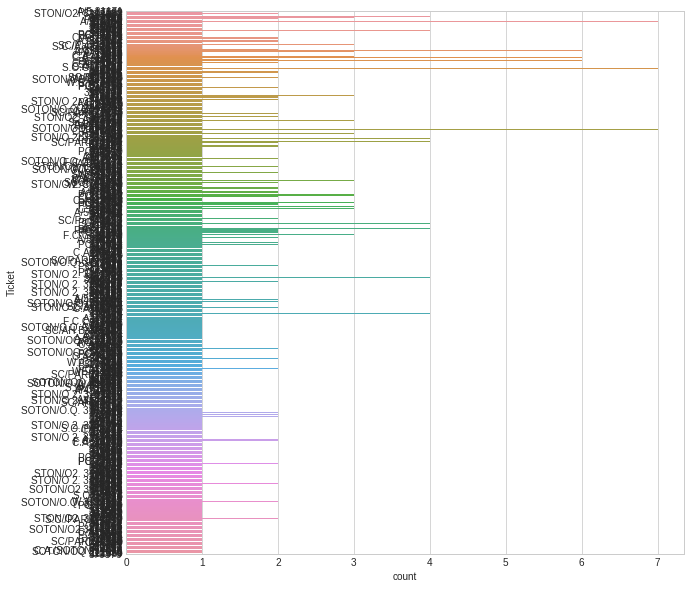

In [69]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Ticket', data = train)